### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [0]:
tf.__version__

'2.1.0'

### Collect Data

In [0]:
import keras

Using TensorFlow backend.


In [0]:
#the dataset is inbuilt in the Keras package
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY=tf.keras.utils.to_categorical(trainY,num_classes=10)
testY=tf.keras.utils.to_categorical(testY,num_classes=10)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt


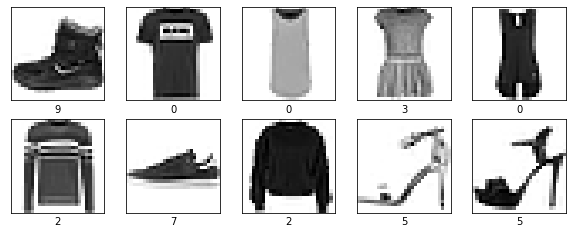

In [0]:
label = [9,0,0,3,0,2,7,2,5,5]
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

In [0]:
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [0]:
#using 20 Epochs as it takes a lot of time to run
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=20,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.6387 - accuracy: 0.7679 - val_loss: 0.6593 - val_accuracy: 0.7585
Epoch 2/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.6376 - accuracy: 0.7707 - val_loss: 0.6609 - val_accuracy: 0.7618
Epoch 3/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.6352 - accuracy: 0.7663 - val_loss: 0.6710 - val_accuracy: 0.7530
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.6284 - accuracy: 0.7637 - val_loss: 0.6456 - val_accuracy: 0.7680
Epoch 5/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6407 - accuracy: 0.7603 - val_loss: 0.6592 - val_accuracy: 0.7462
Epoch 6/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.6540 - accuracy: 0.7561 - val_loss: 0.7209 - val_accuracy: 0.7328
Epoch 7/20
60000/60000 [===========================

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [0]:
model1.fit(trainX,trainY,validation_data=(testX,testY),epochs=20,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/sample - loss: 2.1498 - accuracy: 0.3948 - val_loss: 1.8675 - val_accuracy: 0.5720
Epoch 2/20
60000/60000 [==============================] - 8s 140us/sample - loss: 1.4995 - accuracy: 0.5712 - val_loss: 1.2134 - val_accuracy: 0.6390
Epoch 3/20
60000/60000 [==============================] - 8s 140us/sample - loss: 1.0833 - accuracy: 0.6680 - val_loss: 0.9472 - val_accuracy: 0.7194
Epoch 4/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.8760 - accuracy: 0.7186 - val_loss: 0.7857 - val_accuracy: 0.7405
Epoch 5/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.7539 - accuracy: 0.7378 - val_loss: 0.6976 - val_accuracy: 0.7527
Epoch 6/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.6842 - accuracy: 0.7552 - val_loss: 0.6432 - val_accuracy: 0.7634
Epoch 7/20
60000/60000 [==========================

In [0]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 185,796
Trainable params: 184,228
Non-trainable params: 1,568
____________________________________________

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.optimizers.SGD(learning_rate=0.001)

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd')

In [0]:
model2.fit(trainX,trainY,validation_data=(testX,testY),epochs=20,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/sample - loss: 2.1302 - val_loss: 1.8282
Epoch 2/20
60000/60000 [==============================] - 8s 139us/sample - loss: 1.5185 - val_loss: 1.2634
Epoch 3/20
60000/60000 [==============================] - 8s 140us/sample - loss: 1.1259 - val_loss: 0.9782
Epoch 4/20
60000/60000 [==============================] - 8s 138us/sample - loss: 0.9005 - val_loss: 0.8050
Epoch 5/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.7672 - val_loss: 0.7093
Epoch 6/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.6935 - val_loss: 0.6535
Epoch 7/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.6457 - val_loss: 0.6146
Epoch 8/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.6095 - val_loss: 0.5828
Epoch 9/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.58

In [0]:
model2.summary()

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.optimizers.SGD(learning_rate=0.03)

In [0]:
model3.compile(loss='categorical_crossentropy', optimizer='sgd')

## Review model

In [0]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
model1.fit(trainX,trainY,validation_data=(testX,testY),epochs=20,batch_size=32) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4275 - accuracy: 0.8476 - val_loss: 0.4330 - val_accuracy: 0.8429
Epoch 2/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4219 - accuracy: 0.8495 - val_loss: 0.4292 - val_accuracy: 0.8469
Epoch 3/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4140 - accuracy: 0.8522 - val_loss: 0.4229 - val_accuracy: 0.8465
Epoch 4/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4102 - accuracy: 0.8529 - val_loss: 0.4198 - val_accuracy: 0.8487
Epoch 5/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4030 - accuracy: 0.8563 - val_loss: 0.4166 - val_accuracy: 0.8497
Epoch 6/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3992 - accuracy: 0.8591 - val_loss: 0.4087 - val_accuracy: 0.8514
Epoch 7/20
60000/60000 [==========================